In [3]:
# libraries for project
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Alternative Installation in terminal
pip install pandas
pip install pandasql
python -m pip install -U pip 
python -m pip install -U matplotlib

SyntaxError: invalid syntax. Perhaps you forgot a comma? (Temp/ipykernel_3308/3316190095.py, line 2)

In [4]:
data = pd.read_csv(r'C:\Users\thien\Downloads\JUMPlus_Fifa-main\Python_FIFA_Players\players_20.csv')
#print (df)

In [5]:
df = pd.DataFrame(data)
#print(df)

In [6]:
output = ps.sqldf("select * from df")
#print(output)

In [7]:
# 1. Load the csv file and show top 5 records from it. 
output = ps.sqldf("select * from df limit 5;")
print(output)

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  6/24/1987   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   2/5/1985   
2          Neymar Jr        Neymar da Silva Santos Junior   27   2/5/1992   
3           J. Oblak                            Jan Oblak   26   1/7/1993   
4          E. Hazard                          Eden Hazard   28   1/7/1991   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona 

In [8]:
# 2. How you would be able to see each column's name.
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [9]:
# 3. Need to show number of rows and columns of this dataset.
output1 = len(df.axes[1])
output2 = len(df.axes[0])
print("Rows  Cols")
print(output2 ,output1)

Rows  Cols
18278 104


In [10]:
# 4. Show number of players and their countries.
output = ps.sqldf("""select
                    nationality as 'Country',
                    count(*) as 'Num of Players'
                from
                    df
                group by
                    nationality;""")
print(output)

               Country  Num of Players
0          Afghanistan               2
1              Albania              43
2              Algeria              50
3               Angola              16
4    Antigua & Barbuda               7
..                 ...             ...
157          Venezuela              66
158            Vietnam               1
159              Wales             117
160             Zambia              10
161           Zimbabwe              12

[162 rows x 2 columns]


In [11]:
# 5. If you find many records in point 4 then show only top 10 countries and their number of players.
output = ps.sqldf("""select
                        nationality Country,
                        count(*) as 'Num of Players',
                        AVG(overall)  as 'Avg Potential'
                    from
                        df
                    group by
                        nationality
                    order by 
                        AVG(overall) desc
                    limit 
                        10;""")
print(output)

      Country  Num of Players  Avg Potential
0  Mozambique               4      73.250000
1        Chad               1      73.000000
2     Bahrain               1      72.000000
3     Uruguay             164      71.646341
4     Algeria              50      71.380000
5      Brazil             824      71.161408
6      Israel              16      71.125000
7       Libya               4      71.000000
8     Eritrea               1      71.000000
9       Gabon              16      70.687500


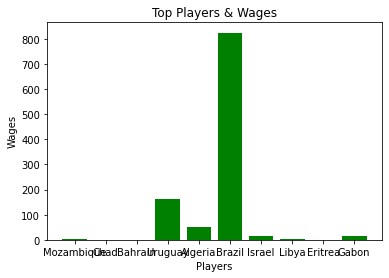

In [12]:
# 6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.
X = output.iloc[:,0]

Y = output.iloc[:,1]
            
plt.bar(X, Y, color='g')
plt.title("Top Players & Wages")
plt.xlabel("Players")
plt.ylabel("Wages")

plt.show()